In [48]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [49]:
airports=pd.read_csv("/content/airports.csv")

print("Lines: ",airports.shape[0])
print("columns: ",airports.shape[1])
airports.head() 

Lines:  67312
columns:  18


,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR


In [50]:
countries=pd.read_csv('/content/countries.csv')
print("Lines: ",countries.shape[0])
print("columns: ",countries.shape[1])
countries.head()

Lines:  247
columns:  6


,id,code,name,continent,wikipedia_link,keywords
0,302672,AD,Andorra,EU,https://en.wikipedia.org/wiki/Andorra,NaN
1,302618,AE,United Arab Emirates,AS,https://en.wikipedia.org/wiki/United_Arab_Emir...,"UAE,مطارات في الإمارات العربية المتحدة"
2,302619,AF,Afghanistan,AS,https://en.wikipedia.org/wiki/Afghanistan,NaN
3,302722,AG,Antigua and Barbuda,NaN,https://en.wikipedia.org/wiki/Antigua_and_Barbuda,NaN
4,302723,AI,Anguilla,NaN,https://en.wikipedia.org/wiki/Anguilla,NaN


In [51]:
regions=pd.read_csv('/content/regions.csv')
print("Lines: ",regions.shape[0])
print("columns: ",regions.shape[1])
regions.head()

Lines:  3963
columns:  8


,id,code,local_code,name,continent,iso_country,wikipedia_link,keywords
0,302811,AD-02,02,Canillo Parish,EU,AD,https://en.wikipedia.org/wiki/Canillo,NaN
1,302812,AD-03,03,Encamp Parish,EU,AD,https://en.wikipedia.org/wiki/Encamp,NaN
2,302813,AD-04,04,La Massana Parish,EU,AD,https://en.wikipedia.org/wiki/La_Massana,NaN
3,302814,AD-05,05,Ordino Parish,EU,AD,https://en.wikipedia.org/wiki/Ordino,NaN
4,302815,AD-06,06,Sant Julià de Lòria Parish,EU,AD,https://en.wikipedia.org/wiki/Sant_Julià_de_Lòria,NaN


In [52]:
#dropping unnecessary data
airports.drop(['wikipedia_link','home_link','keywords'],axis=1,inplace=True) 
countries.drop(['wikipedia_link','keywords'],axis=1,inplace=True) 
regions.drop(['wikipedia_link','keywords'],axis=1,inplace=True)
#Removing Antarctica due to fewer airports
airports=airports[airports['continent']!='AN'] 
countries=countries[countries['continent']!='AN'] 
#Removing closed airports
airports=airports[airports['type']!='closed'] 
#Removing unassigned airports in regions
regions=regions[regions['local_code']!='U-A'] 

In [53]:
#NA for north america is changed with NoA
airports['continent']=airports['continent'].fillna('NoA')
countries['continent']=countries['continent'].fillna('NoA')
# well change NA to NAM for Namibia
airports['iso_country']=airports['iso_country'].fillna('NAM') 
countries['code']=countries['code'].fillna('NAM')

In [54]:
airports.isna().any()

id                   False
ident                 True
type                 False
name                 False
latitude_deg         False
longitude_deg        False
elevation_ft          True
continent            False
iso_country          False
iso_region           False
municipality          True
scheduled_service    False
gps_code              True
iata_code             True
local_code            True
dtype: bool

In [55]:
airports.dropna(subset=['ident','type','name'], inplace=True)

In [56]:
countries.isna().any()

id           False
code         False
name         False
continent    False
dtype: bool

In [57]:
regions.isna().any()

id             False
code           False
local_code      True
name           False
continent       True
iso_country     True
dtype: bool

In [58]:
regions.dropna(subset=['iso_country'], inplace=True)

In [59]:
airports.rename(columns={'elevation_ft':'elevation_m'},inplace=True) #change attribut name
airports['elevation_m']=airports['elevation_m']/3.2808 ## convert to meters
airports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_m,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,3.352841,NoA,US,US-PA,Bensalem,no,00A,NaN,00A
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,1047.000732,NoA,US,US-KS,Leoti,no,00AA,NaN,00AA
2,6524,00AK,small_airport,Lowell Field,59.947733,-151.692524,137.161668,NoA,US,US-AK,Anchor Point,no,00AK,NaN,00AK
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,249.939039,NoA,US,US-AL,Harvest,no,00AL,NaN,00AL
5,322127,00AS,small_airport,Fulton Airport,34.942803,-97.818019,335.284077,NoA,US,US-OK,Alex,no,00AS,NaN,00AS


In [60]:
number_per_country=airports['iso_country'].value_counts()
medium_airports=airports[airports['type']=='medium_airport']["iso_country"].value_counts()
small_airports=airports[airports['type']=='small_airport']["iso_country"].value_counts()
number_per_country

US    23051
BR     5772
JP     2211
CA     2177
AU     2020
      ...  
NR        1
SM        1
YT        1
BL        1
NF        1
Name: iso_country, Length: 242, dtype: int64

In [61]:
airports.set_index('ident',inplace=True) ## set index to ident
print("index is unique ") if airports.index.is_unique else print("index is not  (duplicated index )");

index is unique 


In [62]:
# We will now analyse with INDIAN airports
India_airports=airports[airports['iso_country']=='IN']
India_airports

,id,type,name,latitude_deg,longitude_deg,elevation_m,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code
ident,,,,,,,,,,,,,,
IN-0001,35129,heliport,Siachen Glacier AFS Airport,35.500000,77.000000,6705.681541,AS,IN,IN-JK,NaN,no,NaN,NaN,NaN
IN-0002,35130,heliport,Tawang Air Force Station,27.588461,91.877693,2668.861253,AS,IN,IN-AR,NaN,no,NaN,NaN,NaN
IN-0003,42716,small_airport,Daulat Beg Oldi Advanced Landing Ground,35.396467,77.928965,4937.820044,AS,IN,IN-JK,NaN,no,NaN,NaN,NaN
IN-0004,42717,heliport,Leh Helipad,34.128670,77.536537,3255.913192,AS,IN,IN-JK,NaN,no,NaN,NaN,NaN
IN-0007,42724,heliport,Minicoy Heliport,8.273630,73.022301,NaN,AS,IN,IN-LD,Minicoy,no,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VOTV,26629,large_airport,Trivandrum International Airport,8.482120,76.920097,4.572056,AS,IN,IN-KL,Thiruvananthapuram,yes,VOTV,TRV,NaN
VOTX,26630,small_airport,Tambaram Air Force Station,12.907200,80.121902,27.432334,AS,IN,IN-TN,Chennai,no,VOTX,NaN,NaN
VOVR,32592,small_airport,Vellore Airport,12.908800,79.066803,232.870032,AS,IN,IN-TN,Vellore,no,VOVR,NaN,NaN


Visualization

Text(0.5, 1.0, 'Number of airports per continent')

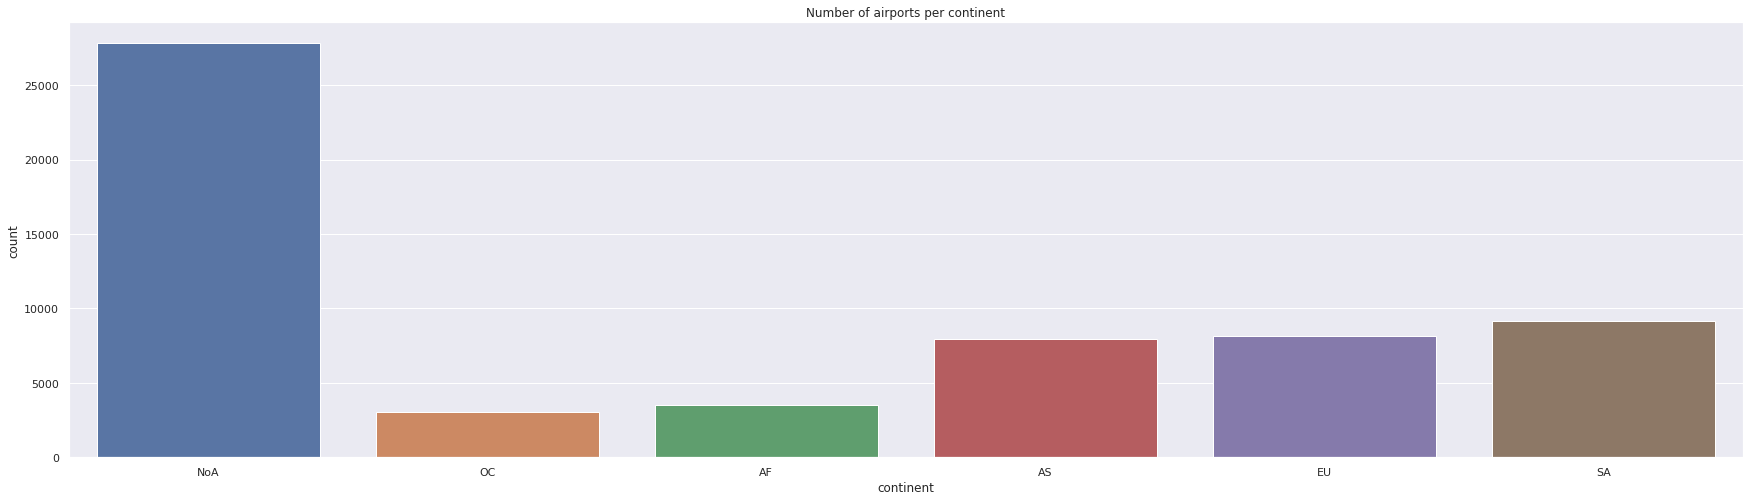

In [63]:
sns.countplot(x='continent',data=airports).set_title('Number of airports per continent')

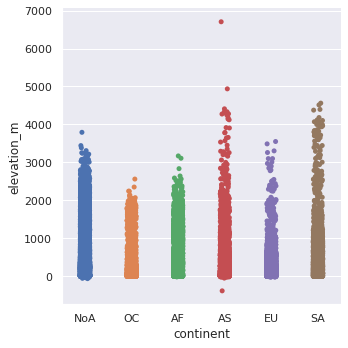

In [64]:
sns.set_theme(style="darkgrid",color_codes=True)
sns.catplot(x='continent', y='elevation_m',data=airports)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'Number of airports per region in India')

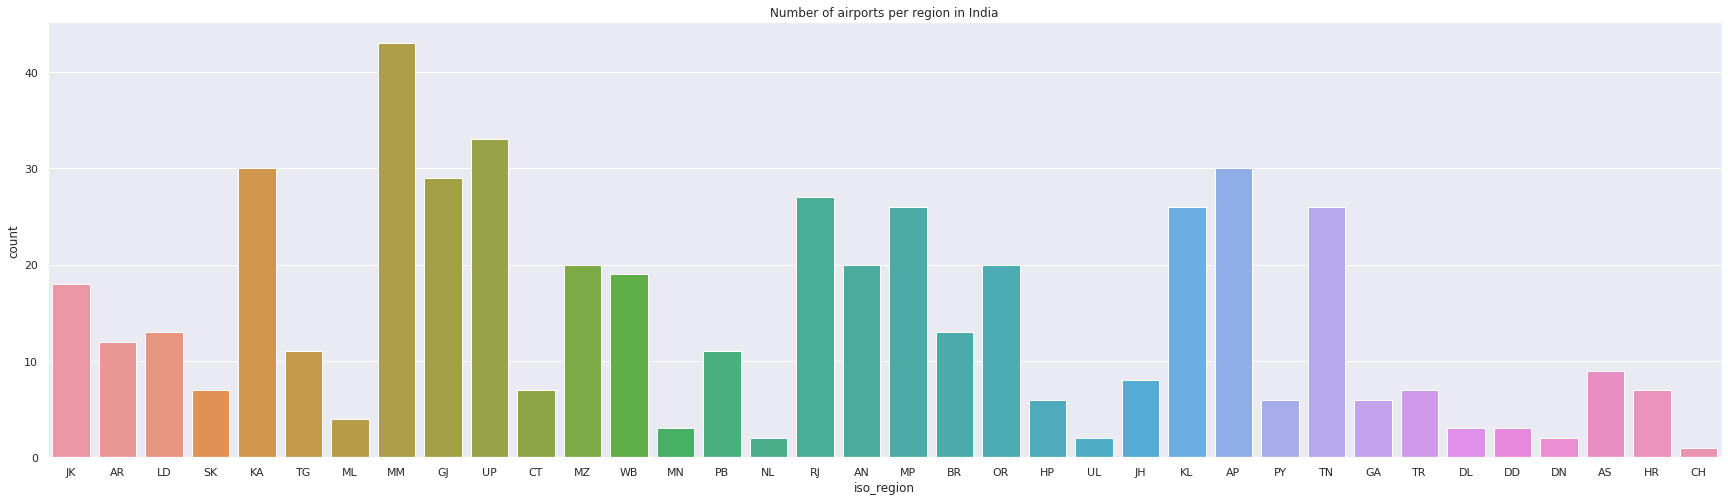

In [65]:
India_airports.loc[:,"iso_region"]=India_airports.loc[:,"iso_region"].replace({'IN-':''}, regex=True)
## set figure size
sns.set(rc={'figure.figsize':(30,8)})
## seaborn title 
sns.countplot(x='iso_region',data=India_airports).set_title('Number of airports per region in India')

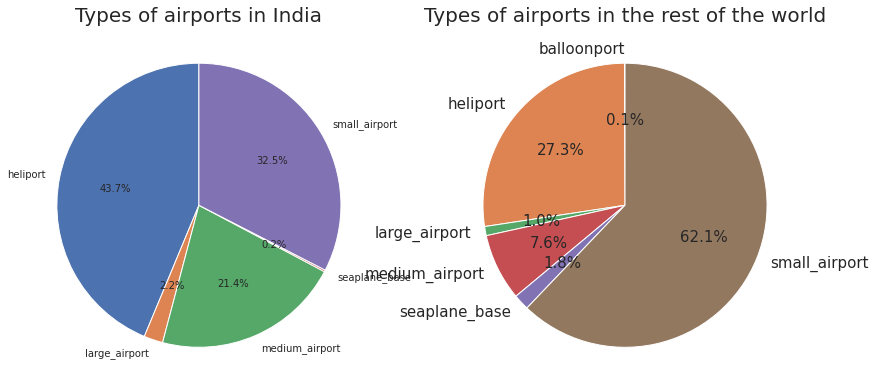

<Figure size 1800x1152 with 0 Axes>

In Inida there is:
 seaplane_base       1
large_airport      11
medium_airport    109
small_airport     166
heliport          223
Name: type, dtype: int64

while there is in the rest of the world :
 balloonport          37
large_airport       621
seaplane_base      1076
medium_airport     4546
heliport          16303
small_airport     37054
Name: type, dtype: int64


In [66]:
#subplot of the number of airports per type
counts = airports['type'].value_counts().sort_index()
labels =[counts.index[i] for i in range(len(counts))]
sizes = [counts.values[i] for i in range(len(counts))]

counts_IN = India_airports['type'].value_counts().sort_index()
labels_IN =[counts_IN.index[i] for i in range(len(counts_IN))]
sizes_IN = [counts_IN.values[i] for i in range(len(counts_IN))]


plt.figure(figsize=(14,8))

plt.subplot(1,2,1.5)
plt.pie(sizes_IN,labels=labels_IN,autopct='%1.1f%%',startangle=90,textprops={'fontsize':10})
plt.title('Types of airports in India',fontsize=20)

plt.subplot(1,2,2)
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90,textprops={'fontsize':15})
plt.title('Types of airports in the rest of the world',fontsize=20)
plt.figure(figsize=(25,16))

plt.show()
print("In Inida there is:\n",counts_IN.sort_values())
print("\nwhile there is in the rest of the world :\n",counts.sort_values())

In [67]:
for i in countries.index:
    #add a new column with the number of airports per country
    code=countries.loc[i,'code']
    if code in number_per_country.index:
        total=number_per_country[code]
        countries.loc[i,'number_of_airports']=total
    else:
        countries.loc[i,'number_of_airports']=0


    if code in medium_airports.index:
        total_medium=medium_airports[code]
        countries.loc[i,'number_of_medium_airports']=total_medium
    else:
        countries.loc[i,'number_of_medium_airports']=0
    
    if code in small_airports.index:
        total_small=small_airports[code]
        countries.loc[i,'number_of_small_airports']=total_small
    else:
        countries.loc[i,'number_of_small_airports']=0
        

countries

,id,code,name,continent,number_of_airports,number_of_medium_airports,number_of_small_airports
0,302672,AD,Andorra,EU,2.0,0.0,0.0
1,302618,AE,United Arab Emirates,AS,114.0,7.0,20.0
2,302619,AF,Afghanistan,AS,71.0,9.0,54.0
3,302722,AG,Antigua and Barbuda,NoA,3.0,1.0,2.0
4,302723,AI,Anguilla,NoA,1.0,1.0,0.0
...,...,...,...,...,...,...,...
242,302609,YT,Mayotte,AF,1.0,1.0,0.0
243,302610,ZA,South Africa,AF,560.0,56.0,461.0
244,302611,ZM,Zambia,AF,102.0,7.0,94.0
245,302612,ZW,Zimbabwe,AF,141.0,8.0,131.0


In [68]:
#dropping US to avoid outliers
countries.drop(countries[countries['code']=='US'].index , inplace=True)

In [69]:
px.choropleth(countries, locations="name", 
                    locationmode='country names', color="number_of_airports", 
                    hover_name="number_of_airports", 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='number of airports per country'
)


In [70]:
px.choropleth(countries, locations="name", 
                    locationmode='country names', color="number_of_medium_airports", 
                    hover_name="number_of_medium_airports",
                    color_continuous_scale="Viridis",
                    title='number OF MEDIUM airports per country'
)

In [71]:
px.choropleth(countries, locations="name", 
                    locationmode='country names', color="number_of_small_airports",
                    hover_name="number_of_small_airports", 
                    color_continuous_scale="Viridis",
                    title='number small airports per country'
)

In [72]:
number_per_region=India_airports['iso_region'].value_counts()
IN_regions=regions[regions['iso_country']=='IN']

for i in IN_regions.index:
    code=IN_regions.loc[i,'local_code']
    total=number_per_region[code]
    IN_regions.loc[i,'number_of_airports']=total

IN_regions.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,code,local_code,name,continent,iso_country,number_of_airports
1407,304164,IN-AN,AN,Andaman and Nicobar Islands,AS,IN,20.0
1408,304165,IN-AP,AP,Andhra Pradesh,AS,IN,30.0
1409,304166,IN-AR,AR,Arunachal Pradesh,AS,IN,12.0
1410,304167,IN-AS,AS,Assam,AS,IN,9.0
1411,304168,IN-BR,BR,Bihar,AS,IN,13.0
